In [1]:
# This reads in FITS-format files to take a look

# Created 2021 March 13 by E.S.

# ref. https://learn.astropy.org/FITS-tables.html

In [41]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import pandas as pd

%matplotlib qt

In [4]:
stem = "/Users/bandari/Downloads/dr12/sdss/spectro/redux/104/spectra/3467/"
#stem = "/Users/bandari/Desktop/dst_data"

In [5]:
leaf = "spec-3467-54999-0411.fits"

In [6]:
def info_standalone(file_name_leaf):
    '''
    Reads in a FITS file and prints the HDU primary and extensions
    
    INPUTS:
    file_name_leaf: leaf of file name beyond the 'stem' set above
    '''
    
    hdul = fits.open(stem + file_name_leaf)
    
    # print some things
    print(hdul.info())

In [7]:
info_standalone(leaf)

Filename: /Users/bandari/Downloads/dr12/sdss/spectro/redux/104/spectra/3467/spec-3467-54999-0411.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     150   ()      
  1  COADD         1 BinTableHDU     26   3838R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   
  4  B2-00061781-00061783-00061784    1 BinTableHDU    162   2047R x 7C   [E, E, E, J, E, E

In [8]:
hdul = fits.open(stem + leaf)

In [38]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4751939680.56 / 1st row Number of seconds since Nov 17 1858    
RA      =            121.00000 / 1st row RA of telescope boresight (deg)        
DEC     =            90.000000 / 1st row Dec of telescope boresight (degrees)   
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '06:31:05.64'        / 1st row TAI time HH:MM:SS.SS                   
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                54999 / MJD of observation                             
MJDLIST = '54999   '        

In [28]:
print(hdul[4].columns)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'calib'; format = 'E'
)


In [ ]:
print(hdul[4])

stuff = hdul[4].data
print(hdul[4].columns)

In [31]:
hdul[4].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   28 / length of dimension 1                          
NAXIS2  =                 2047 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
TAI     =        4751937065.65 / 1st row Number of seconds since Nov 17 1858    
RA      =            121.00000 / 1st row RA of telescope boresight (deg)        
DEC     =            90.000000 / 1st row Dec of telescope boresight (degrees)   
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '        

In [53]:
# read in Stacy's text files
stem2 = "/Users/bandari/Documents/git.repos/rrlyrae_metallicity/rrlyrae_metallicity/src/s82_spectra/"
df1 = pd.read_csv(stem2 + "spec-3467-54999-0411g001.dat", delim_whitespace=True, names=["wavel","flux","noise"])
df2 = pd.read_csv(stem2 + "spec-3467-54999-0411g002.dat", delim_whitespace=True, names=["wavel","flux","noise"])
df3 = pd.read_csv(stem2 + "spec-3467-54999-0411g003.dat", delim_whitespace=True, names=["wavel","flux","noise"])

for i in range(4,12):
    stuff = hdul[i].data
    plt.plot(np.power(10,stuff["loglam"]),stuff["flux"])
    plt.plot(np.power(10,stuff["loglam"]),np.sqrt(np.divide(1.,stuff["ivar"])))
    print(np.median(np.divide(stuff["flux"],np.divide(1.,stuff["ivar"]))))
plt.plot(df1["wavel"],df1["flux"], color="k", linestyle="--",zorder=10)
plt.plot(df2["wavel"],df2["flux"], color="k", linestyle="--",zorder=10)
plt.plot(df3["wavel"],df3["flux"], color="k", linestyle="--",zorder=10)
plt.plot(df1["wavel"],df1["noise"], color="k", linestyle="--",zorder=10)
plt.plot(df2["wavel"],df2["noise"], color="k", linestyle="--",zorder=10)
plt.plot(df3["wavel"],df3["noise"], color="k", linestyle="--",zorder=10)
plt.show()

9.426513
9.424489
9.339518
14.012903
15.517313
15.957525
14.319868
19.875286


/Users/bandari/anaconda3/envs/rrl_env/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/bandari/anaconda3/envs/rrl_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/bandari/anaconda3/envs/rrl_env/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/bandari/anaconda3/envs/rrl_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/bandari/anaconda3/envs/rrl_env/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sy

In [48]:
plt.plot(df1["wavel"],df1["flux"], color="k", linestyle="--",zorder=10)
plt.show()

In [43]:
df1["wavel"]

0      3900.0
1      3901.4
2      3902.8
3      3904.2
4      3905.6
        ...  
781    4993.4
782    4994.8
783    4996.2
784    4997.6
785    4999.0
Name: wavel, Length: 786, dtype: float64

In [5]:
def plot_transmission(file_name_leaf):
    '''
    Reads in FITS file filter transmission and plots it
    
    INPUTS:
    file_name_leaf: leaf of file name beyond the 'stem' set above
    '''
    
    hdul = fits.open(stem + file_name_leaf)
    
    # print some things
    print(hdul.info())
    print(hdul[1].columns)
    
    # convert to table
    evt_data = Table(hdul[1].data, names=["wavel", "transm"])
    
    print((len(np.squeeze(evt_data["wavel"].data))))
    
    # plot
    plt.plot(np.squeeze(evt_data["wavel"].data),np.squeeze(evt_data["transm"].data))
    plt.show()

In [6]:
# simulated data
info_standalone("/simulated_dst_data/test03_20210414.fits")
print("---")
# empirical data
info_standalone("/empirical_dst_data/S20200201S0247.fits")

Filename: /Users/bandari/Desktop/dst_data/simulated_dst_data/test03_20210414.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     193   ()      
  1  SCI           1 ImageHDU        72   (2048, 2048)   float32   
  2  DQ            3 ImageHDU        61   (2048, 2048)   uint8   
None
---
Filename: /Users/bandari/Desktop/dst_data/empirical_dst_data/S20200201S0247.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     193   ()      
  1  SCI           1 ImageHDU        74   (2048, 2048)   float32   
  2  DQ            3 ImageHDU        63   (2048, 2048)   uint8   
None


In [14]:
hdul = fits.open(stem + "/empirical_dst_data/S20200201S0247.fits")

In [21]:
print(hdul[2].header.keys)

<bound method Header.keys of XTENSION= 'IMAGE   '           /  C# FITS: 2/1/2020 5:53:02 AM                  
BITPIX  =                    8                                                  
NAXIS   =                    2 / Dimensionality                                 
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
PCOUNT  =                    0 / No extra parameters                            
GCOUNT  =                    1 / One group                                      
INHERIT =                    F / Inherit the primary header                     
LONGSTRN= 'OGIP 1.0'           /  The OGIP Long String Convention may be used.  
EXTVER  =                    3 / Number assigned to this FITS extension         
EXTNAME = 'DQ      '           /  Extension Name                                
BUNIT   = 'bitmap  '           /  Physical units of the array values            

In [8]:
plot_transmission(leaf_H)

Filename: /Users/bandari/Documents/git.repos/gpi2_dst/detector_data/GPI-filter-H.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1                1 BinTableHDU     21   1R x 2C   [2501E, 2501E]   
None
ColDefs(
    name = 'WAVELENGTH'; format = '2501E'
    name = 'TRANSMISSION'; format = '2501E'
)
2501


Filename: /Users/bandari/Documents/git.repos/gpi2_dst/detector_data/GPI-filter-J.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1                1 BinTableHDU     21   1R x 2C   [2501E, 2501E]   
None
ColDefs(
    name = 'WAVELENGTH'; format = '2501E'
    name = 'TRANSMISSION'; format = '2501E'
)


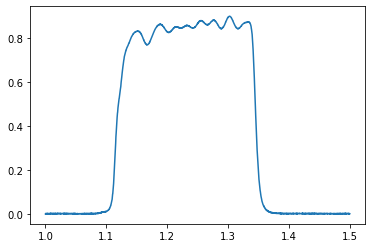

In [7]:
plot_transmission(leaf_J)

Filename: /Users/bandari/Documents/git.repos/gpi2_dst/detector_data/GPI-filter-K1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1                1 BinTableHDU     21   1R x 2C   [3501E, 3501E]   
None
ColDefs(
    name = 'WAVELENGTH'; format = '3501E'
    name = 'TRANSMISSION'; format = '3501E'
)


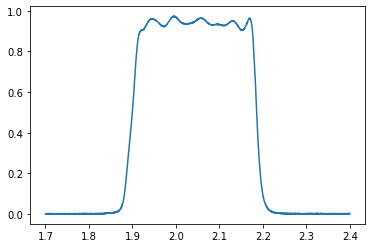

In [8]:
plot_transmission(leaf_K1)

Filename: /Users/bandari/Documents/git.repos/gpi2_dst/detector_data/GPI-filter-K2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1                1 BinTableHDU     21   1R x 2C   [3501E, 3501E]   
None
ColDefs(
    name = 'WAVELENGTH'; format = '3501E'
    name = 'TRANSMISSION'; format = '3501E'
)


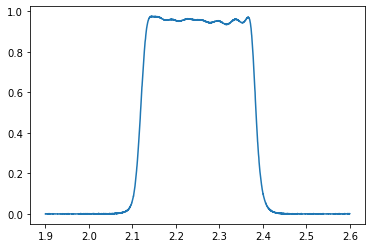

In [9]:
plot_transmission(leaf_K2)

Filename: /Users/bandari/Documents/git.repos/gpi2_dst/detector_data/GPI-filter-Y.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1                1 BinTableHDU     21   1R x 2C   [2001E, 2001E]   
None
ColDefs(
    name = 'WAVELENGTH'; format = '2001E'
    name = 'TRANSMISSION'; format = '2001E'
)


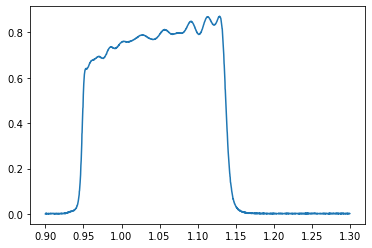

In [10]:
plot_transmission(leaf_Y)

In [14]:
hdul = fits.open(stem + test)

# print some things
print(hdul.info())
print(hdul[1].columns)

Filename: /Users/bandari/Documents/git.repos/gpi2_dst/Microlens/ifu_microlens_psfY.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   (55, 55, 925)   float64   
None


IndexError: list index out of range

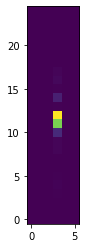

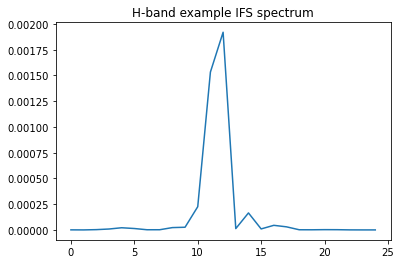

In [29]:
# plot low-res spectra from simulated frames

hdul = fits.open(stem + "/zem/test_H.fits")

img = hdul[0].data[490:515,504:510]

plt.imshow(img, origin="lower")
plt.show()

plt.clf()
plt.plot(np.max(img,axis=1))
plt.title("H-band example IFS spectrum (simulated)")
plt.show()

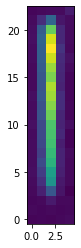

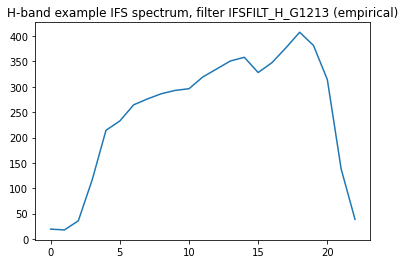

In [37]:
# plot low-res spectra from simulated frames

hdul = fits.open("/Users/bandari/Desktop/gpi_dst_relevant_data/spectral_empirical_data/S20131210S0025.fits")

img = hdul[1].data[989:1012,975:980]

plt.imshow(img, origin="lower")
plt.show()

plt.clf()
plt.plot(np.max(img,axis=1))
plt.title("H-band example IFS spectrum, filter IFSFILT_H_G1213 (empirical)")
plt.show()

array([[-2.1762674 , -1.0364825 , -0.6754992 , ..., -8.127111  ,
        -1.5940858 , -4.9919353 ],
       [-3.6632104 ,  1.2999232 , -1.0994625 , ...,  1.3982334 ,
        -2.9811826 , -0.15629798],
       [-2.1255763 , -0.5357142 , -1.2914746 , ..., -2.0026882 ,
        -3.0518432 , -2.266897  ],
       ...,
       [ 0.27380952,  3.393625  ,  1.1739631 , ...,  4.356759  ,
        -0.02265746,  1.1109833 ],
       [ 0.36751145, -1.8982335 ,  3.6363287 , ...,  3.5195854 ,
         0.685484  , -1.4973117 ],
       [ 5.56106   ,  2.87596   , -0.26075283, ..., -2.008833  ,
         3.2108295 ,  1.9635177 ]], dtype=float32)